## Ibovespa Stocks Analysis

### 1. Bibliotecas

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### 2. Conjunto de Dados (B3 Stocks)

- O conjunto de dados ***b3_stocks*** apresenta informações sobre a cotação de diferentes ações entre os anos de **1994 a 2020 (Junho)**

In [2]:
b3_stocks = pd.read_csv('../data/b3_stocks_1994_2020.csv')

In [3]:
def informacoes_iniciais_df(df):

    print ('\n-- Informações Iniciais')
    print (df.info())

    print ('\n-- Estatísticas Iniciais')
    print (df.describe())

    print ('\n-- Quantidade de Dados Nulos por Coluna')
    print(df.isna().sum())

    print ('\n-- Últimos Registros')
    print (df.tail())
    
informacoes_iniciais_df(b3_stocks)


-- Informações Iniciais
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1809947 entries, 0 to 1809946
Data columns (total 7 columns):
 #   Column    Dtype  
---  ------    -----  
 0   datetime  object 
 1   ticker    object 
 2   open      float64
 3   close     float64
 4   high      float64
 5   low       float64
 6   volume    float64
dtypes: float64(5), object(2)
memory usage: 96.7+ MB
None

-- Estatísticas Iniciais
               open         close          high           low        volume
count  1.809947e+06  1.809947e+06  1.809947e+06  1.809947e+06  1.809947e+06
mean   6.512529e+01  6.526713e+01  6.579533e+01  6.454454e+01  1.545318e+07
std    1.711272e+03  1.716709e+03  1.721703e+03  1.704968e+03  9.168620e+07
min    1.000000e-02  0.000000e+00  1.000000e-02  1.000000e-02  0.000000e+00
25%    3.770000e+00  3.770000e+00  3.840000e+00  3.700000e+00  1.779800e+04
50%    1.314000e+01  1.314000e+01  1.339000e+01  1.298000e+01  2.484430e+05
75%    3.506000e+01  3.510000e+01  3.570

## 3. Visualizações Iniciais

### 3.1 Ações da PETR4 e VALE3 (2015 - Atualmente)

In [4]:
def cotacao_da_empresa(ticker, datetime):
    
    cotacoes_td = b3_stocks[(b3_stocks['ticker'] == ticker) & (b3_stocks['datetime'] >= datetime)]
    
    return cotacoes_td

In [5]:
# Ações Preferenciais da Petrobras (PETR4) a partir de 2015
petr4 = cotacao_da_empresa('PETR4', '2015-01-01')
petr4_dates = pd.to_datetime(petr4['datetime'])
petr4_close = petr4['close']

# Ações Ordinárias da Vale (VALE3) a partir de 2015
vale3 = cotacao_da_empresa('VALE3', '2015-01-01')
vale3_dates = pd.to_datetime(vale3['datetime'])
vale3_close = vale3['close']

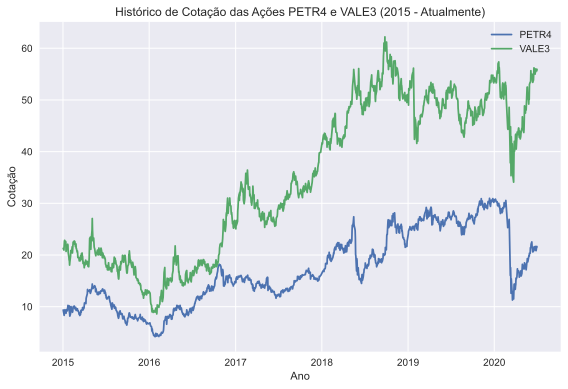

In [6]:
# Gráfico com as cotações de ambas as empresas
plt.style.use('seaborn')

plt.plot_date(petr4_dates, petr4_close, linestyle='solid', marker='')
plt.plot_date(vale3_dates, vale3_close, linestyle='solid', marker='')

plt.title('Histórico de Cotação das Ações PETR4 e VALE3 (2015 - Atualmente)')
plt.legend(['PETR4', 'VALE3'])
plt.xlabel('Ano')
plt.ylabel('Cotação')

plt.tight_layout()
plt.show()

#### 3.1.1 Correlação de Pearson

"Quanto maior for o valor absoluto do coeficiente, mais forte é a relação entre as variáveis. Para a correlação de Pearson, um valor absoluto de 1 indica uma relação linear perfeita. A correlação perto de 0 indica que não há relação linear entre as variáveis. O sinal de cada coeficiente indica a direção da relação." [1]

"You may have stocks in different sectors but if their returns depend on the same thing (e.g. the economy in a particular state) your portfolio is getting almost no protection from diversification." [2]

Referências: <br>
[1] [Interpretação dos Resultados de Correlação](https://support.minitab.com/pt-br/minitab/18/help-and-how-to/statistics/basic-statistics/how-to/correlation/interpret-the-results/key-results/) <br>
[2] [Why Correlation Matters for Investors?](https://smartasset.com/investing/stock-correlation) <br>
[3] [Scipy - Coeficiente de Pearson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#r8c6348c62346-1) <br>
[4] [Four ways to quantify synchrony between time series data](https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9)

In [7]:
r, p = stats.pearsonr(petr4.dropna()['close'], vale3.dropna()['close'])
print("Correlação de Pearson: {:.2f}".format(r))

Correlação de Pearson: 0.89


#### 3.1.2 Total Negociado

A importância de avaliar o volume de negociações.

Referências:
<br>
[1] [O volume de negociação era o que estava faltando para você começar a acertar na bolsa de valores e eu vou dizer por quê](https://www.osmelhoresinvestimentos.com.br/bolsa-de-valores/volume-de-negociacao/)

In [8]:
vale3.head()

,datetime,ticker,open,close,high,low,volume
1337727,2015-01-02,VALE3,21.70,21.28,21.95,21.06,120672152.0
1338043,2015-01-05,VALE3,20.76,20.96,21.13,20.51,173776434.0
1338344,2015-01-06,VALE3,21.27,21.80,22.13,21.07,212788714.0
1338652,2015-01-07,VALE3,22.32,22.60,22.81,21.97,135618045.0
1338962,2015-01-08,VALE3,22.77,22.84,22.88,22.11,104941063.0


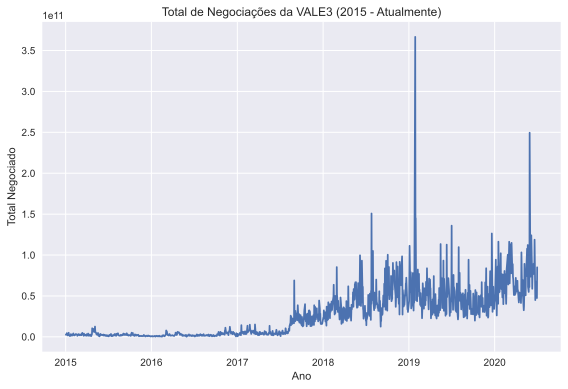

In [9]:
vale3['total_traded'] = vale3['open'] * vale3['volume']

plt.plot_date(vale3_dates, vale3['total_traded'], label='VALE3', linestyle='solid', marker='')

plt.title('Total de Negociações da VALE3 (2015 - Atualmente)')
plt.xlabel('Ano')
plt.ylabel('Total Negociado')

plt.tight_layout()
plt.show()

In [10]:
vale3.iloc[[vale3.total_traded.argmax()]]

,datetime,ticker,open,close,high,low,volume,total_traded
1669570,2019-01-28,VALE3,45.0,42.38,48.0,42.36,8.147844e+09,3.666530e+11


#### Análise

O que levou o pico de negociações da Vale nesse período?

- [Perda de R$ 71 bilhões em 1 dia da Vale é a maior da história do mercado brasileiro](https://g1.globo.com/economia/noticia/2019/01/28/perda-de-r-70-bilhoes-em-1-dia-da-vale-e-a-maior-da-historia-do-mercado-brasileiro.ghtml)

### 3.2 Ações da MGLU3 e WEGE3 (2015 - Atualmente)

In [11]:
mglu3 = cotacao_da_empresa('MGLU3', '2015-01-01')
mglu3_dates = pd.to_datetime(mglu3['datetime'])
mglu3_close = mglu3['close']

wege3 = cotacao_da_empresa('WEGE3', '2015-01-01')
wege3_dates = pd.to_datetime(wege3['datetime'])
wege3_close = wege3['close']

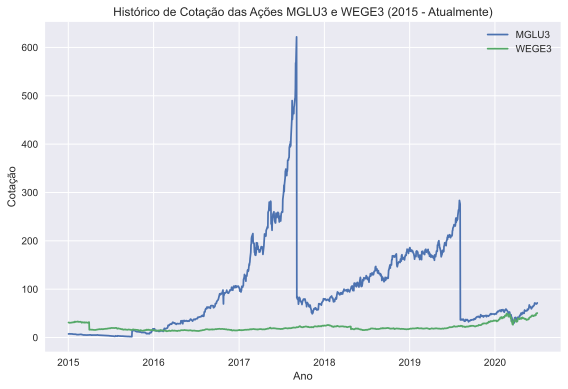

In [12]:
plt.style.use('seaborn')

plt.plot_date(petr4_dates, mglu3_close, linestyle='solid', marker='')
plt.plot_date(vale3_dates, wege3_close, linestyle='solid', marker='')

plt.title('Histórico de Cotação das Ações MGLU3 e WEGE3 (2015 - Atualmente)')
plt.legend(['MGLU3', 'WEGE3'])
plt.xlabel('Ano')
plt.ylabel('Cotação')

plt.tight_layout()
plt.show()

### Análise

- O que justifica a queda no valor das ações da MGLU3 nos anos de 2017 e 2019?
    - No dia 5 de setembro de 2017 houve o desdobramento das ações, na razão de 1 para 8.
    - Novamente, em 6 de agosto de 2019, houve novo desdobramento das ações, na mesma razão de 1 para 8.
    
#### O que é desdobramento?

In [13]:
mglu3_17 = b3_stocks[(b3_stocks['ticker'] == 'MGLU3') & (b3_stocks['datetime'] >= '2017-09-01') & (b3_stocks['datetime'] <= '2017-09-30')]
mglu3_19 = b3_stocks[(b3_stocks['ticker'] == 'MGLU3') & (b3_stocks['datetime'] >= '2019-08-01') & (b3_stocks['datetime'] <= '2019-08-31')]

In [14]:
print ('\n-- Primeiro desdobramento (05/09/2017)')
print (mglu3_17.head(3))

print ('\n-- Segundo desdobramento (06/08/2019)')
print (mglu3_19.head(4))


-- Primeiro desdobramento (05/09/2017)
           datetime ticker    open   close    high     low       volume
1547601  2017-09-01  MGLU3  579.00  564.14  603.99  561.42  197657194.0
1547935  2017-09-04  MGLU3  566.00  621.79  622.00  555.00  157591533.0
1548293  2017-09-05  MGLU3   79.76   82.00   86.40   78.56  243650457.0

-- Segundo desdobramento (06/08/2019)
           datetime ticker    open   close    high     low       volume
1713442  2019-08-01  MGLU3  269.50  276.50  279.24  268.30  682317406.0
1713802  2019-08-02  MGLU3  280.60  283.55  284.79  277.50  401133774.0
1714173  2019-08-05  MGLU3  282.00  276.00  282.00  275.31  517615566.0
1714546  2019-08-06  MGLU3   35.59   36.60   37.06   35.53  635057740.0


In [15]:
tickets_list = ['BRFS3', 'BRSR6', 'EGIE3', 'ITUB4', 'LAME4', 'LINX3', 'MGLU3', 'PETR4', 'USIM5', 'VALE3', 'VLID3', 'WEGE3']

In [16]:
corr_df = pd.DataFrame(columns=['tickets', 'pearson_corr'])

for ticket in tickets_list:
    for ticket2 in tickets_list:
        
        if ticket != ticket2:
            
            t1 = cotacao_da_empresa(ticket, '2017-01-01')
            t2 = cotacao_da_empresa(ticket2, '2017-01-01')
            
            r, p = stats.pearsonr(t1.dropna()['close'], t2.dropna()['close'])
            
            #print ('Correlação entre {} e {}: {:.2f}'.format(ticket, ticket2, r))
            
            tickets = [ticket, ticket2]
            tickets.sort()
            
            new_tickets = '{} & {}'.format(tickets[0], tickets[1])
            
            if new_tickets not in corr_df['tickets'].values:
            
                t_series = pd.Series([new_tickets, r], index = corr_df.columns)
                corr_df = corr_df.append(t_series, ignore_index=True)

In [17]:
corr_df.head()

,tickets,pearson_corr
0,BRFS3 & BRSR6,-0.132743
1,BRFS3 & EGIE3,-0.124199
2,BRFS3 & ITUB4,0.115879
3,BRFS3 & LAME4,-0.220748
4,BRFS3 & LINX3,-0.079799


In [18]:
corr_df_sorted = corr_df.sort_values('pearson_corr', ascending=True).drop_duplicates('tickets', keep='first')

In [19]:
# Tickets com correlação negativa
corr_df_sorted.head()

,tickets,pearson_corr
8,BRFS3 & VALE3,-0.694059
65,VLID3 & WEGE3,-0.539997
37,ITUB4 & WEGE3,-0.522696
55,MGLU3 & WEGE3,-0.472389
30,ITUB4 & LAME4,-0.445127


In [20]:
# Tickets com correlação positiva
corr_df_sorted.tail()

,tickets,pearson_corr
23,EGIE3 & LINX3,0.815366
14,BRSR6 & LINX3,0.826855
16,BRSR6 & PETR4,0.838366
44,LAME4 & WEGE3,0.845782
46,LINX3 & PETR4,0.859739


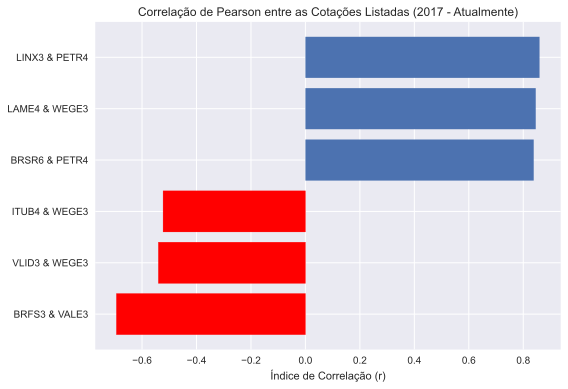

In [21]:
minmax_corr = pd.concat([corr_df_sorted.head(3), corr_df_sorted.tail(3)])

x = minmax_corr.tickets.values
y = minmax_corr.pearson_corr.values

barplot = plt.barh(x, y)

barplot[0].set_color('r')
barplot[1].set_color('r')
barplot[2].set_color('r')

plt.title('Correlação de Pearson entre as Cotações Listadas (2017 - Atualmente)')
plt.xlabel('Índice de Correlação (r)')

plt.savefig('../img/corr.png')

plt.tight_layout()
plt.show()

### 3.3 Fundos Imobiliários

---